# Application of Machine Learning on the Iris Dataset

## 1. Importing libraries

In [19]:
# importing dataprocessing functions
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# importing model functions
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# Importing metrics function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Other library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## 2. Importing and cleaning dataset
The iris dataset is kindly provided by the SkLearn team.

In [2]:
def pre_process_iris(iris):    
    x = pd.DataFrame(iris.data, columns = ["Sepal Length","Sepal Width","Petal Length","Petal Width"])
    y = pd.DataFrame(iris.target, columns = ["Types"])
    return x, y

In [3]:
iris = load_iris()
x, y = pre_process_iris(iris)
x_standardized = StandardScaler().fit_transform(x)

In [4]:
n_classes = len(set(y['Types']))

## 3. Data exploration

In [5]:
print(type(iris), type(iris.data), type(iris.target),
      f"Features are of type {type(x_standardized)}...\nand targets are of type {type(y)}.",
      "---",
      f"Respectively, they are of shape: {x_standardized.shape}, {y.shape}.",
      "---",
      f"The goal is to determine which data points belongs to one of {len(set(y['Types']))} classes.",
      sep="\n")

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Features are of type <class 'numpy.ndarray'>...
and targets are of type <class 'pandas.core.frame.DataFrame'>.
---
Respectively, they are of shape: (150, 4), (150, 1).
---
The goal is to determine which data points belongs to one of 3 classes.


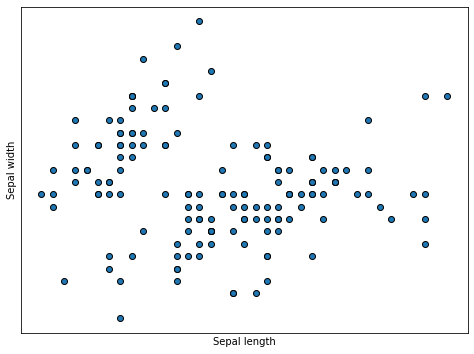

In [6]:
x_viz = x_standardized[:, :3]

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(x_viz[:, 0], x_viz[:, 1], cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xticks(())
plt.yticks(())
plt.show()

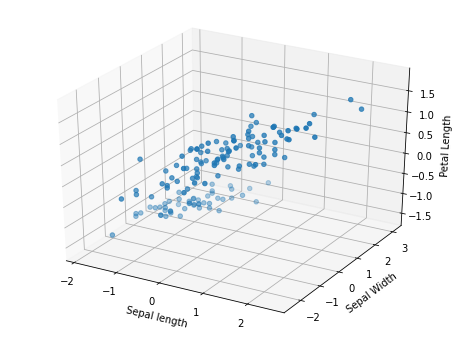

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_viz[:, 0], x_viz[:, 1], x_viz[:, 2])

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

# 4. K-Means

### Declaring variables

In [8]:
class_passes_centroids = {} # Empty dict() that will hold the centroids obtained after model fitting
class_passes_labels = {} #Empty dict() that will hold the labels obtained after model fitting
max_n = 6 # max number of clusters to fit with
max_n_to_plot = min(4,max_n) # max number of clusters that will be plotted
start_n = 1 # minimum of cluster to fit and plot with

colors = ['red', 'green', 'blue', 'pink', 'purple', 'cyan']

### Modelization

The first step is to fit the k-means model given a number of clusters.

In [9]:
for n in range(start_n, max_n+1):
    # Declaring the model
    kmeans = KMeans(n_clusters=n)
    # Fitting the model
    print(f"Fitting the model for {n} clusters.")
    kmeans.fit(x_standardized)
    # Recording the model
    class_passes_centroids[n] = kmeans.cluster_centers_
    class_passes_labels[n] = labels = kmeans.labels_

Fitting the model for 1 clusters.
Fitting the model for 2 clusters.
Fitting the model for 3 clusters.
Fitting the model for 4 clusters.
Fitting the model for 5 clusters.
Fitting the model for 6 clusters.


### Visualization

The second step is to visualize the result of the KMeans model.

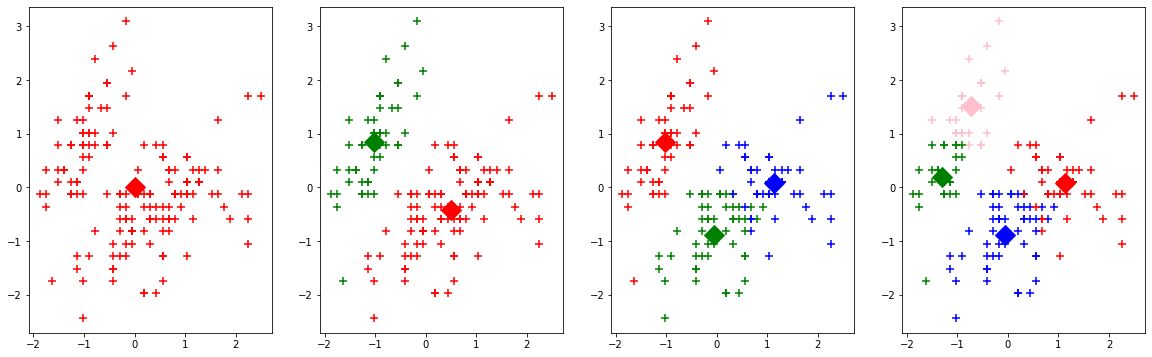

In [10]:
fig, axs = plt.subplots(1, max_n_to_plot-start_n+1, figsize=(20,6))

for n in range(start_n, max_n_to_plot+1):
    cd = class_passes_centroids[n]
    lb = class_passes_labels[n]

    for idx, cd in enumerate(cd):
        axs[n-start_n].scatter(cd[0], cd[1], color = colors[idx], marker="D", s=200)
        
    for idx in range(len(x)):
        axs[n-start_n].scatter(x_viz[idx, 0], x_viz[idx, 1], color = colors[lb[idx]],marker="+",s=75)

# 5. PCA

### Declaring variables

In [11]:
PCA_passes = {} # Empty dict() that will hold the components obtained after model fitting
max_components = 3 # max number of components

colors = {0:'r', 1:'g', 2:'b'}

### Modelization

The first step is to fit the PCA component model given a number of components.

In [12]:
for n in range(2,max_components+1):
    # Declaring the model
    pca = PCA(n_components=n)
    # Fitting the model
    print(f"Fitting the model for {n} components.")
    principal_components = pca.fit_transform(x_standardized)
    # Recording the model
    PCA_passes[n]=principal_components

Fitting the model for 2 components.
Fitting the model for 3 components.


### Visualization

The second step is to visualize the result of the KMeans model.

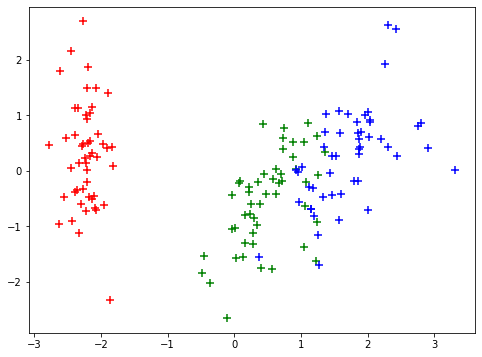

In [13]:
# Plotting PCA components with n=2
fig = plt.figure(figsize=(8, 6))
for idx, val in enumerate(PCA_passes[2][:]):
    plt.scatter(val[0], val[1], marker="+", s=75, c=colors[int(y.iloc[idx])])

plt.show()

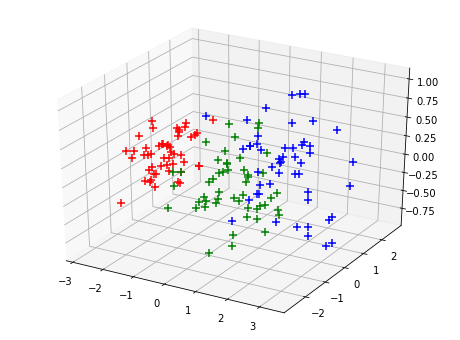

In [14]:
# Plotting PCA components with n=3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
for idx, val in enumerate(PCA_passes[3][:]):
    ax.scatter(val[0], val[1], val[2], marker="+", s=75,c=colors[int(y.iloc[idx])])

plt.show()

# 6. Support Vector Machine

### Declaring variables

In [21]:
kernel = "linear" #
gamma = "scale" #
shrinking = False #

x_st_train, x_st_test, y_train, y_test = train_test_split(x_standardized, 
                                                          y, 
                                                          test_size=0.2)

### Modelization

The first step is to fit the PCA component model given a number of components.

In [22]:
# Declaring the model
svm_iris = SVC(kernel = kernel, gamma = gamma, shrinking = shrinking)
# Fitting the model
svm_iris.fit(x_st_train, y_train)

/home/quentin/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear', shrinking=False)

### Visualization

The second step is to visualize the result of the KMeans model.

In [23]:
svm_iris.coef_

array([[-0.44160007,  0.33327159, -0.88829426, -0.92490932],
       [-0.06466635,  0.13871306, -0.55328576, -0.55651544],
       [ 0.31203753,  0.4389421 , -1.96125114, -2.14676026]])

In [25]:
predictions = svm_iris.predict(x_st_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

